# **EDA dataset "Freelancers"**

### 1. Importar librerias que vamos a usar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Carga del dataset
Una vez limpios los datos, vamos a cargar nuestro dataset para poder ver que información tenemos y que información y conclusiones podemos sacar.

In [2]:
df = pd.read_csv("../data/freelancers_clean.csv")
df.sample(3)

,freelancer_id,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate,rating,is_active,client_satisfaction
576,FL250577,Kelli Ramirez,Female,28,South Korea,Korean,Graphic Design,2.0,50.0,NaN,True,85.0
509,FL250510,Anthony Gaines,Male,52,United States,English,DevOps,17.0,75.0,0.0,False,94.0
209,FL250210,Jennifer Rowe,Female,47,Germany,German,Data Analysis,15.0,40.0,2.1,True,94.0


### 3. Visualizaciones y Insights – EDA Freelancers

In [ ]:
df.groupby("years_of_experience").agg({"freelancer_id":"count"}).sort_values(by="freelancer_id", ascending=False).head(10)

,freelancer_id
years_of_experience,
0.0,72
2.0,67
1.0,64
3.0,51
4.0,49
11.0,43
6.0,40
8.0,37
5.0,37


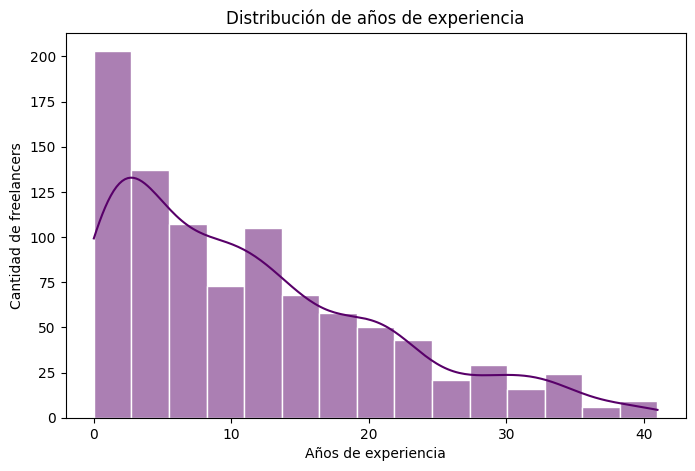

In [181]:
plt.figure(figsize=(8,5))
sns.histplot(df['years_of_experience'], bins=15, color="#580069", edgecolor='white', kde=True) 
plt.xlabel('Años de experiencia')
plt.ylabel('Cantidad de freelancers')
plt.title('Distribución de años de experiencia')
plt.show()

#### **Distribución de los años de experiencia**
- Qué muestra: En este histograma vemos representado como están distribuidos los freelancers según sus años de experiencia.
- Observaciones:
    - La mayoría de freelancers tiene poca experiencia (0–10 años).
    - Conforme aumenta la experiencia, disminuye el número de freelancers.
    - Hay pocos perfiles senior, pero con experiencia amplia.
- Interpretación: El dataset está dominado por perfiles junior/intermedios, útil para contextualizar análisis posteriores sobre desempeño y tarifas.

In [180]:
df.groupby("primary_skill").agg({"freelancer_id":"count"}).sort_values(by="freelancer_id", ascending=False)

,freelancer_id
primary_skill,
DevOps,112
UI/UX Design,109
Blockchain Development,105
Web Development,104
Mobile Apps,102
AI,100
Data Analysis,96
Graphic Design,93
Machine Learning,93


C:\Users\adria\AppData\Local\Temp\ipykernel_27984\3281305648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='magma')


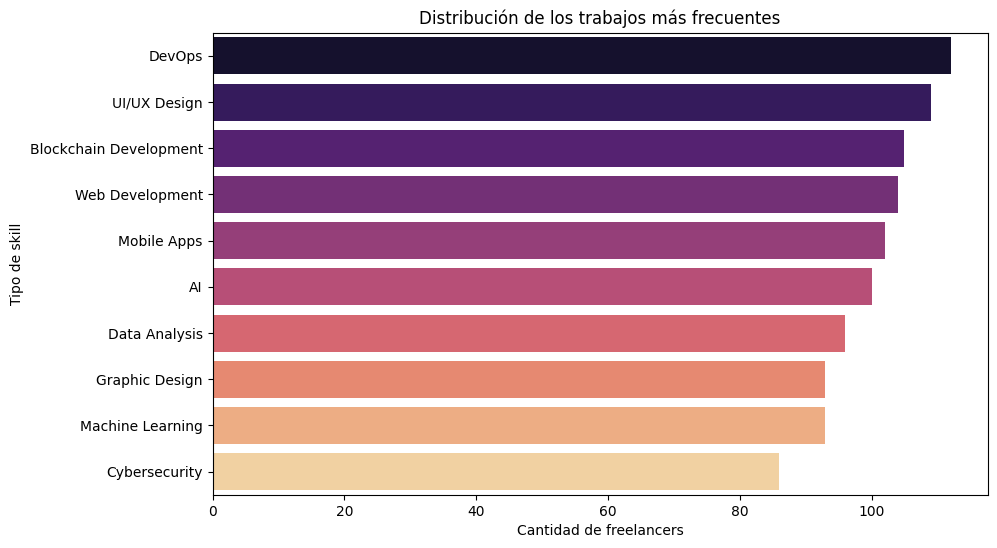

In [211]:
skill_counts = df['primary_skill'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='magma')
plt.xlabel('Cantidad de freelancers')
plt.ylabel('Tipo de skill')
plt.title('Distribución de los trabajos más frecuentes')
plt.show()

#### **Distribución segun la skill**
- Qué muestra: En este barplot podemos ver la frecuencia de cada tipo de skill principal de los freelancers.
- Insight:
    - Identifica claramente los trabajos más frecuentes, siendo los tres mas representativos: DevOps, UI/UX Design y Blockchain Development.
    - Permite detectar qué categorías predominan en la plataforma.
- Interpretación: Ayuda a entender la composición del talento disponible y las áreas más populares.

In [123]:
df.groupby(["primary_skill", "gender"]).agg({"freelancer_id":"count"})

freelancer_id
primary_skill          gender               
AI                     Female             43
                       Male               57
Blockchain Development Female             49
                       Male               56
Cybersecurity          Female             40
                       Male               46
Data Analysis          Female             41
                       Male               55
DevOps                 Female             54
                       Male               58
Graphic Design         Female             46
                       Male               47
Machine Learning       Female             44
                       Male               49
Mobile Apps            Female             68
                       Male               34
UI/UX Design           Female             53
                       Male               56
Web Development        Female             52
                       Male               52

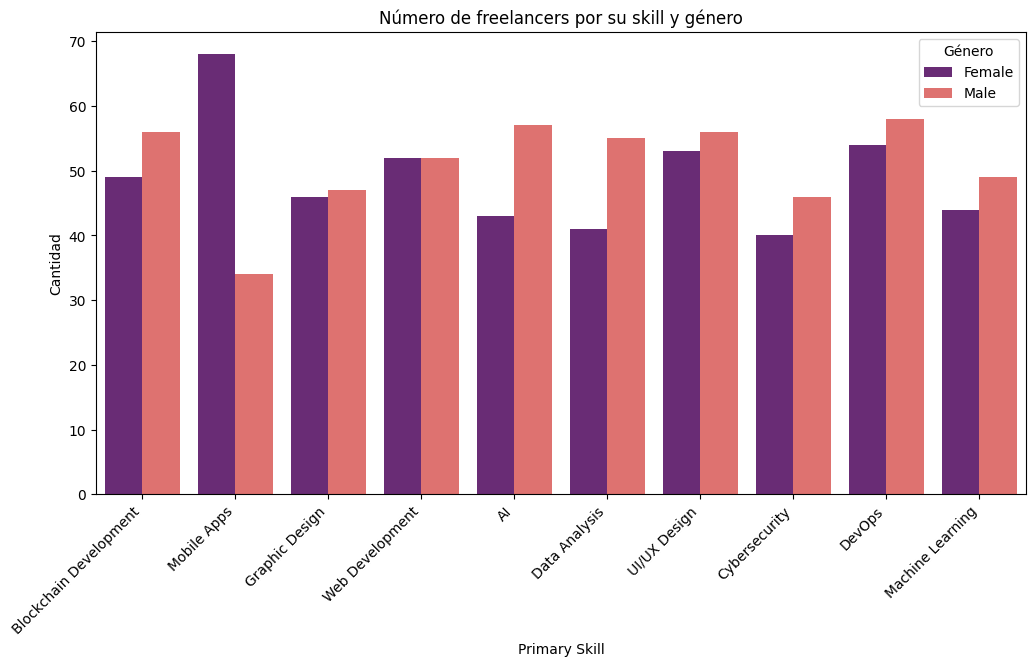

In [212]:
plt.figure(figsize=(12,6))
sns.countplot(x='primary_skill', hue='gender', palette='magma' , data=df)
plt.title('Número de freelancers por su skill y género')
plt.xlabel('Primary Skill')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.show()

#### **Número de freelancers segun su skill y género**
- Qué muestra: En este countplot podemos ver el número de freelancers por skill, diferenciando género.
- Insight:
    - En general, hay equilibrio de género, aunque predominan ligeramente la presencia masculina en la mayoría de las skills.
    - Excepción: en Mobile Apps hay el doble de mujeres que hombres.
- Interpretación: Permite ver diferencias entre grupos y detectar patrones de diversidad en skills específicas.

In [208]:
df.groupby(['years_of_experience', 'rating']).size().reset_index(name='count')

,years_of_experience,rating,count
0,0.0,0.0,11
1,0.0,1.1,3
2,0.0,1.2,3
3,0.0,1.3,2
4,0.0,1.4,1
...,...,...,...
566,40.0,2.5,1
567,40.0,2.6,1
568,40.0,3.4,1
569,40.0,4.6,1


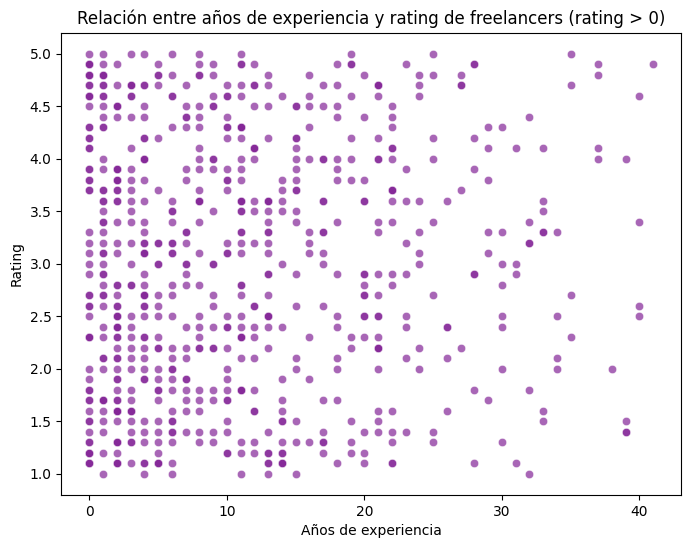

In [ ]:
df_rating = df[df['rating'] > 0]  # Filtramos los ratings mayores a 0 para eliminar valores de freelancers que aun no han recibido ninguna valoración.

plt.figure(figsize=(8,6))
sns.scatterplot(x='years_of_experience', y='rating', data=df_rating, color="#842597", alpha=0.7)
plt.xlabel('Años de experiencia')
plt.ylabel('Rating')
plt.title('Relación entre años de experiencia y rating de freelancers (rating > 0)')
plt.show()

#### **Relación entre años de experiencia y rating de los freelancers**
- Qué muestra: En este scatterplot podemos ver la relación entre experiencia y rating (desempeño).
- Insight:
    - Muchos freelancers con poca experiencia tienen ratings altos, demostrando habilidades destacadas.
    - También hay perfiles con mucha experiencia pero ratings bajos.
    - La habilidad pesa más que la experiencia para el desempeño.
- Interpretación: Permite detectar outliers, patrones de desempeño y la independencia relativa entre experiencia y rating.

In [205]:
summary = df.groupby('country')['hourly_rate'].agg(q25 = lambda x: x.quantile(0.25), median = 'median', q75 = lambda x: x.quantile(0.75))

def detect_outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return list(set(x[(x < lower) | (x > upper)]))

summary['outliers'] = df.groupby('country')['hourly_rate'].apply(detect_outliers).values

summary

,q25,median,q75,outliers
country,,,,
Argentina,30.0,50.0,75.00,[]
Australia,32.5,45.0,75.00,[]
Brazil,20.0,40.0,75.00,[]
Canada,30.0,40.0,75.00,[]
China,40.0,50.0,75.00,[]
Egypt,30.0,40.0,75.00,[]
France,40.0,40.0,50.00,"[100.0, 20.0]"
Germany,30.0,45.0,75.00,[]
India,30.0,62.5,100.00,[]


C:\Users\adria\AppData\Local\Temp\ipykernel_27984\2933368549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='hourly_rate', data=df, palette='magma')


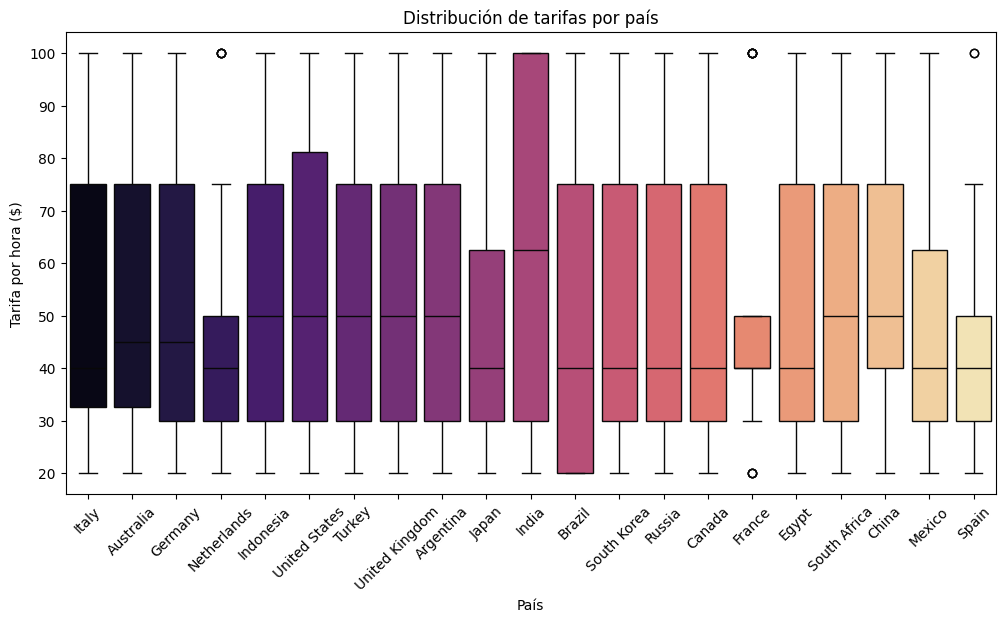

In [190]:
plt.figure(figsize=(12,6))
sns.boxplot(x='country', y='hourly_rate', data=df, palette='magma')
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Tarifa por hora ($)')
plt.title('Distribución de tarifas por país')
plt.show()

#### **Distribución de tarifas por país**
- Qué muestra: En este boxplot podemos ver la distribución de tarifas por hora según el país de los freelancers.
- Insight:
    - La mayoría de países tiene tarifas entre 30–75/80$/h, con medianas alrededor de 40–50$/h.
    - Países como India, China, México, Netherlands, France y España muestran mayor dispersión y outliers al alza.
    - El resto de países tienen mercados más homogéneos, sin outliers fuera de rango.
- Interpretación: Permite comparar la dimensión económica por país y detectar mercados con freelancers premium o económicos extremos.

### 4. Conclusiones exploratorias
#### 1. Resumen de las características del dataset
- El dataset contiene información de 1.000 freelancers con datos personales, profesionales y económicos.
- Cada freelancer tiene un identificador único (id), asegurando que no hay duplicados y permitiendo rastrear registros individuales.
- Variables principales:
    - Numéricas: age, years_of_experience, hourly_rate, rating, client_satisfaction.
    - Categorías: gender, primary_skill, country, is_active.
- Datos con algunas incoherencias de valores que se corrigieron posteriormente, con pocos valores nulos en age y years_of_experience, y algunos nulos en hourly_rate, rating, client_satisfaction e is_active.
- No existen filas duplicadas, y cada freelancer tiene un identificador único.

#### 2. Principales hallazgos
- Experiencia:
    - La mayoría de freelancers tiene poca experiencia (0–10 años), con disminución gradual hacia perfiles senior.
    - Hay personas con mucha experiencia pero ratings variados; la experiencia no siempre asegura un mejor desempeño.
- Habilidades y género:
    - Las categorías más frecuentes son primary_skill relacionadas con desarrollo web y apps.
    - Distribución de género generalmente equilibrada, salvo en Mobile Apps, donde hay más mujeres que hombres.
- Desempeño (rating):
    - Freelancers con poca experiencia pueden tener ratings altos, demostrando habilidades destacadas.
    - Los ratings están distribuidos de manera bastante uniforme entre 1 y 5 para la mayoría de los niveles de experiencia.
- Tarifas por país (hourly_rate):
    - La mayoría de países tienen tarifas entre 30–75/80 $/h, con medianas alrededor de 40–50 $/h.
    - Países como India, China, México, Netherlands, France y España muestran mayor dispersión y outliers al alza.
    - El resto de países presentan tarifas más homogéneas, sin outliers significativos.
- Actividad:
    - Hay aproximadamente la misma cantidad de freelancers activos e inactivos, sin patrones fuertes por edad o experiencia.

#### 3. Cambios aplicados durante la limpieza
- Se limpiaron los nombres de las columnas para tenerlas todas en el mismo formato de minusculas con "_" y sin simbolos.
- Se normalizaron las columnas:
    - En las columnas categóricas como gender, normalizamos sus variables para solo tener "Male" o "Female", al igual que en la columna "is_active", que transformamos sus valores a True/False, segun si estaban en activo o no.
    - En las columnas numéricas como hourly_rate, se eliminaron los simbolos y caracteres ("$" y "USD") y convertimos todos los valores de la columna a float64. Al igual que con client_satisfaction, eliminando el simbolo "%" y convirtiendolos a float64.
- Se analizaron los valores nulos(*NaN*) y se analizaron para ver si eran relevantes y si se deberían imputar o no:
    - Se imputó la columna age con la mediana, para mantener un análisis robusto y no distorsionar la distribución.
    - Se decidió no imputar:
        - years_of_experience → para evitar crear inconsistencias en los datos.
        - hourly_rate → evitar distorsión de análisis económico.
        - rating, client_satisfaction, is_active → valores subjetivos o decisiones propias del freelancer.
- Se verificó que no hubiera filas duplicadas y que cada freelancer tuviera un identificador único.